findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


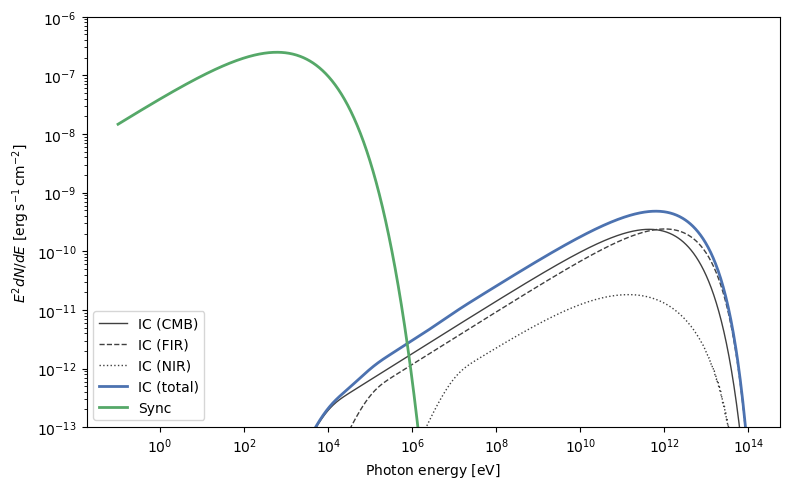

In [1]:
import naima
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

# Define models
ECPL = naima.models.ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'),
        1*u.TeV, 2.1, 13*u.TeV)

IC = naima.models.InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR'])
IC.particle_distribution.index = 1.8
SYN = naima.models.Synchrotron(ECPL, B=100*u.uG)

# Compute SEDs
spectrum_energy = np.logspace(-1,14,1000)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')
for seed, ls in zip(['CMB', 'FIR', 'NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,label='IC ({0})'.format(seed),c='0.25')
plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])
plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-13, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')

In [2]:
from naima.models import ExponentialCutoffPowerLaw, Synchrotron, InverseCompton
from astropy.constants import c

ECPL = ExponentialCutoffPowerLaw(1e36 * u.Unit("1/eV"), 1 * u.TeV, 2.1, 13 * u.TeV)
SYN = Synchrotron(ECPL, B=100 * u.uG)

# Define energy array for synchrotron seed photon field and compute
# Synchroton luminosity by setting distance to 0. The energy range should
# capture most of the synchrotron output.
Esy = np.logspace(-6, 5, 100) * u.eV
Lsy = SYN.flux(Esy, distance=0 * u.cm)

# Define source radius and compute photon density
R = 2 * u.pc
phn_sy = Lsy / (4 * np.pi * R ** 2 * c) * 2.24

# Create IC instance with CMB and synchrotron seed photon fields:

IC = InverseCompton(
    ECPL, seed_photon_fields=["CMB", "FIR", "NIR", ["SSC", Esy, phn_sy]]
)

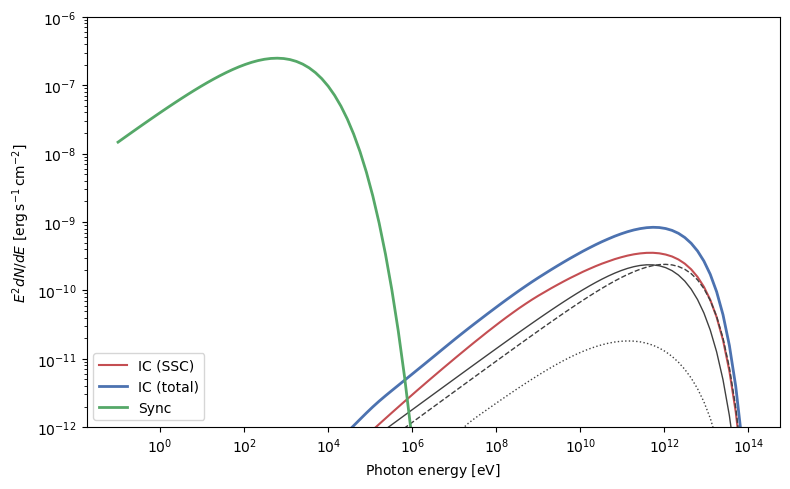

In [3]:
import naima
from naima.models import (ExponentialCutoffPowerLaw, Synchrotron,
                          InverseCompton)
from astropy.constants import c
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np

ECPL = ExponentialCutoffPowerLaw(1e36*u.Unit('1/eV'), 1*u.TeV, 2.1, 13*u.TeV)
SYN = Synchrotron(ECPL, B=100*u.uG)

# Define energy array for synchrotron seed photon field and compute
# Synchroton luminosity by setting distance to 0.
Esy = np.logspace(-6, 6, 100)*u.eV
Lsy = SYN.flux(Esy, distance=0*u.cm)

# Define source radius and compute photon density
R = 2 * u.pc
phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.26

# Create IC instance with CMB and synchrotron seed photon fields:
IC = InverseCompton(ECPL, seed_photon_fields=['CMB', 'FIR', 'NIR',
                                              ['SSC', Esy, phn_sy]])

# Compute SEDs
spectrum_energy = np.logspace(-1,14,100)*u.eV
sed_IC = IC.sed(spectrum_energy, distance=1.5*u.kpc)
sed_SYN = SYN.sed(spectrum_energy, distance=1.5*u.kpc)

# Plot
plt.figure(figsize=(8,5))
plt.rc('font', family='sans')
plt.rc('mathtext', fontset='custom')
ssc = IC.sed(spectrum_energy, seed='SSC', distance=1.5*u.kpc)
plt.loglog(spectrum_energy,ssc,lw=1.5,
        ls='-',label='IC (SSC)',c=naima.plot.color_cycle[2])
for seed, ls in zip(['CMB','FIR','NIR'], ['-','--',':']):
    sed = IC.sed(spectrum_energy, seed=seed, distance=1.5*u.kpc)
    plt.loglog(spectrum_energy,sed,lw=1,
            ls=ls,c='0.25')#,label='IC ({0})'.format(seed))

plt.loglog(spectrum_energy,sed_IC,lw=2,
        label='IC (total)',c=naima.plot.color_cycle[0])
plt.loglog(spectrum_energy,sed_SYN,lw=2,label='Sync',c=naima.plot.color_cycle[1])
plt.xlabel('Photon energy [{0}]'.format(
        spectrum_energy.unit.to_string('latex_inline')))
plt.ylabel('$E^2 dN/dE$ [{0}]'.format(
        sed_SYN.unit.to_string('latex_inline')))
plt.ylim(1e-12, 1e-6)
plt.tight_layout()
plt.legend(loc='lower left')


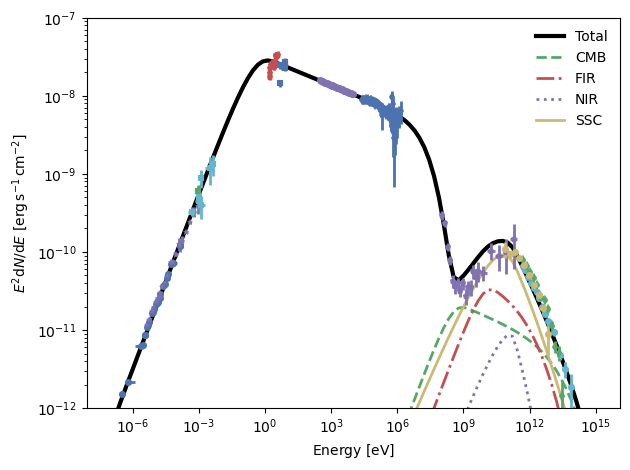

In [4]:
import astropy.units as u
import numpy as np
from astropy.constants import c
from astropy.io import ascii

import naima
from naima.models import (
    ExponentialCutoffBrokenPowerLaw,
    InverseCompton,
    Synchrotron,
)

ECBPL = ExponentialCutoffBrokenPowerLaw(
    amplitude=3.699e36 / u.eV,
    e_0=1 * u.TeV,
    e_break=0.265 * u.TeV,
    alpha_1=1.5,
    alpha_2=3.233,
    e_cutoff=1863 * u.TeV,
    beta=2.0,
)

eopts = {"Eemax": 50 * u.PeV, "Eemin": 0.1 * u.GeV}

SYN = Synchrotron(ECBPL, B=125 * u.uG, Eemax=50 * u.PeV, Eemin=0.1 * u.GeV)

# Compute photon density spectrum from synchrotron emission assuming R=2.1 pc
Rpwn = 2.1 * u.pc
Esy = np.logspace(-7, 9, 100) * u.eV
Lsy = SYN.flux(Esy, distance=0 * u.cm)  # use distance 0 to get luminosity
phn_sy = Lsy / (4 * np.pi * Rpwn ** 2 * c) * 2.24

IC = InverseCompton(
    ECBPL,
    seed_photon_fields=[
        "CMB",
        ["FIR", 70 * u.K, 0.5 * u.eV / u.cm ** 3],
        ["NIR", 5000 * u.K, 1 * u.eV / u.cm ** 3],
        ["SSC", Esy, phn_sy],
    ],
    Eemax=50 * u.PeV,
    Eemin=0.1 * u.GeV,
)

# Use plot_data from naima to plot the observed spectra
data = ascii.read("/fefs/aswg/workspace/juan.jimenez/data/other_results/CrabNebula_spectrum.ecsv")
figure = naima.plot_data(data, e_unit=u.eV)
ax = figure.axes[0]

# Plot the computed model emission
energy = np.logspace(-7, 15, 100) * u.eV
ax.loglog(
    energy,
    IC.sed(energy, 2 * u.kpc) + SYN.sed(energy, 2 * u.kpc),
    lw=3,
    c="k",
    label="Total",
)
for i, seed, ls in zip(
    range(4), ["CMB", "FIR", "NIR", "SSC"], ["--", "-.", ":", "-"]
):
    ax.loglog(
        energy,
        IC.sed(energy, 2 * u.kpc, seed=seed),
        lw=2,
        c=naima.plot.color_cycle[i + 1],
        label=seed,
        ls=ls,
    )


ax.set_ylim(1e-12, 1e-7)
ax.legend(loc="upper right", frameon=False)
figure.tight_layout()
figure.savefig("CrabNebula_SynSSC.png")